9. In this exercise, we will predict the number of applications received
using the other variables in the College data set.

In [501]:
import warnings
warnings.simplefilter("ignore")

In [502]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial


In [503]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split



In [504]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
# !pip install l0bnb
from l0bnb import fit_path


In [505]:
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm


(a) Split the data set into a training set and a test set.

In [506]:
College = load_data('College')
# College = pd.read_csv('College.csv')

> !!!!!这里使用load_data还是pd.read_csv其实是有区别：一个是按列读取的，一个是按行读取的

In [507]:
College.shape
# College.dropna

(777, 18)

In [508]:
# College.dropna
College.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [509]:
College.dropna

<bound method DataFrame.dropna of     Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0       Yes   1660    1232     721         23         52         2885   
1       Yes   2186    1924     512         16         29         2683   
2       Yes   1428    1097     336         22         50         1036   
3       Yes    417     349     137         60         89          510   
4       Yes    193     146      55         16         44          249   
..      ...    ...     ...     ...        ...        ...          ...   
772      No   2197    1515     543          4         26         3089   
773     Yes   1959    1805     695         24         47         2849   
774     Yes   2097    1915     695         34         61         2793   
775     Yes  10705    2453    1317         95         99         5217   
776     Yes   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0            53

In [510]:
College = pd.get_dummies(College, columns=['Private'], drop_first = True)


In [511]:
# Auto = load_data('Auto')
# Auto_train, Auto_valid = train_test_split(Auto,
#                                          test_size=196,
#                                          random_state=0)
coll_train,coll_valid = train_test_split(College,
                                         test_size=194,
                                         random_state=0)
coll_train.shape,coll_valid.shape                                    

((583, 18), (194, 18))

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [512]:
College[:10]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,1
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,1
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,1
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,1
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,1


In [513]:
# College = College.set_index('name')
# Unnamed: 0

# College_re = College.set_index('Unnamed: 0')
# College_re.columns


> 这里写College = College.set_index('Unnamed: 0')居然是错误的！！！

In [514]:
design = MS(College.columns.drop('Accept')).fit(College)
Y = np.array(College['Accept'])
# Y = College['Accept']
X = design.transform(College)
# sigma2 = OLS(Y,X.astype(float)).fit().scale

sigma2 = OLS(Y,X).fit().scale

这里
sigma2 = OLS(Y,X.astype(float)).fit().scale
会报错，原因可能是因为College第一列为文字

In [515]:
# Hitters = load_data('Hitters')
# Hitters[:10]

In [516]:
College['Apps']

0       1660
1       2186
2       1428
3        417
4        193
       ...  
772     2197
773     1959
774     2097
775    10705
776     2989
Name: Apps, Length: 777, dtype: int64

In [517]:
# College['Private']

In [518]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   intercept    777 non-null    float64
 1   Apps         777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
 17  Private_Yes  777 non-null    uint8  
dtypes: float64(2), int64(15), uint8(1)
memory usage: 1

> X.info()，这将显示可用的列及其数据类型。确认它们都是数字性质的。如果它们是 Object 或 bool，则对值进行适当的转换，以便将它们转换为 1 和 0，然后运行 ​​OLS。

In [519]:
College['Private_Yes']

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private_Yes, Length: 777, dtype: uint8

In [520]:
strategy = Stepwise.fixed_steps(design,
                                len(design.terms),
                                direction='forward')
full_path = sklearn_selection_path(OLS, strategy)



In [521]:
full_path.fit(College, Y)
Yhat_in = full_path.predict(College)
Yhat_in.shape



(777, 18)

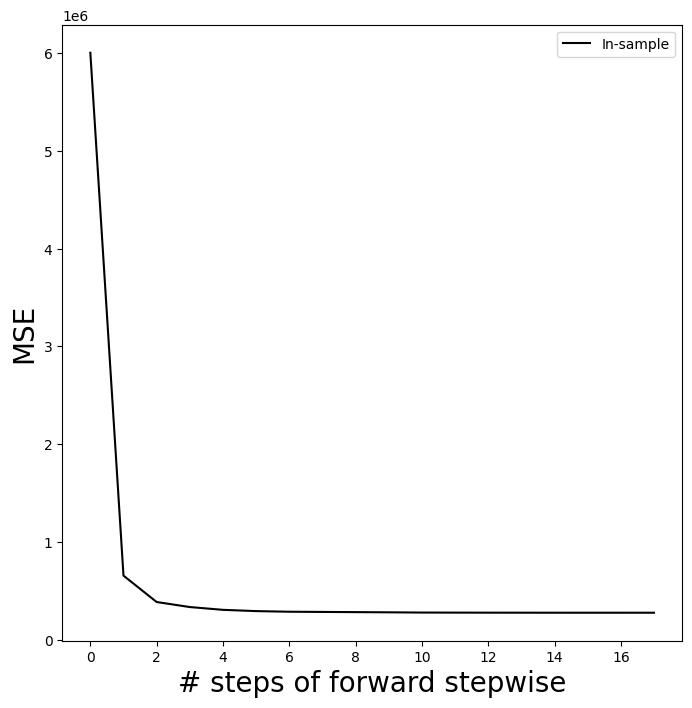

In [522]:
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
              fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
# ax.set_ylim([50000,250000]);


In [523]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
                                College,
                                Y,
                                cv=kfold)
Yhat_cv.shape


(777, 18)

In [524]:
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
# cv_mse.shape

cv_mse


array([[3435217.72783271, 8059167.73629255, 6003904.05619109,
        4379043.73234346, 8205420.49787105],
       [ 675980.27154454,  482487.18154209,  668965.73813105,
         455037.0649624 , 1059617.16470227],
       [ 412487.66955638,  382805.92063663,  403167.40456966,
         276566.13084162,  639800.8273313 ],
       [ 363756.95968899,  260667.1818885 ,  367739.34460026,
         231284.48754388,  573715.34671203],
       [ 334814.64112967,  264914.30927705,  315389.28338283,
         217463.10601209,  554111.98723385],
       [ 340514.0796173 ,  248027.34482646,  315088.50507768,
         226385.6710708 ,  536551.63066948],
       [ 342268.54049874,  240963.75332245,  301506.93546991,
         219374.52447844,  555828.98471427],
       [ 319602.14227857,  263579.92809905,  300021.26947524,
         235084.44060905,  537618.49965726],
       [ 320111.27404589,  266758.54935736,  307473.75590555,
         240106.77174226,  538459.89144602],
       [ 317839.52773172,  265923.726

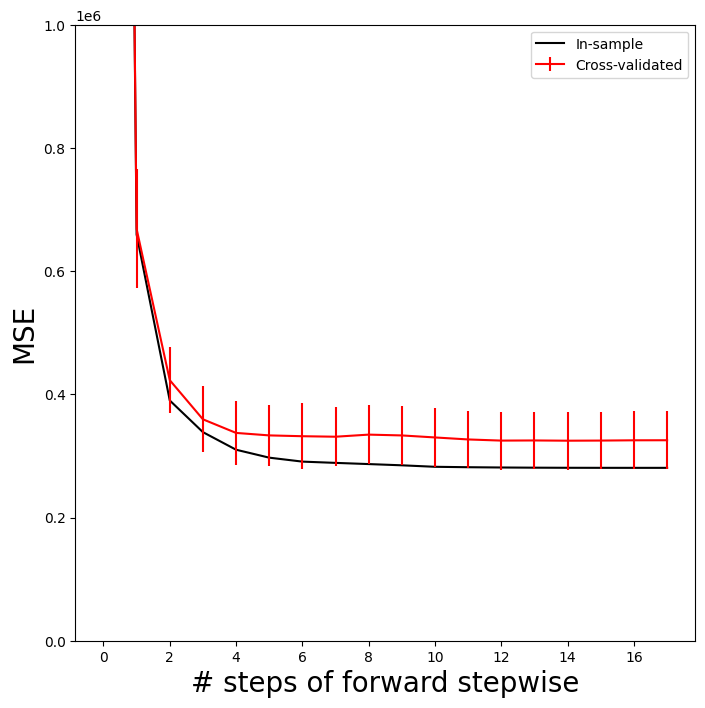

In [525]:
ax.errorbar(np.arange(n_steps), 
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r') # color red
ax.set_ylim([0,1000000]) # 还以为出错了，原来是y轴的范围没弄对
ax.legend()
mse_fig


In [526]:
validation = skm.ShuffleSplit(n_splits=1, 
                              test_size=0.2,
                              random_state=0)
for train_idx, test_idx in validation.split(Y):
    full_path.fit(College.iloc[train_idx],
                  Y[train_idx])
    Yhat_val = full_path.predict(College.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx,None])**2
    validation_mse = errors.mean(0)


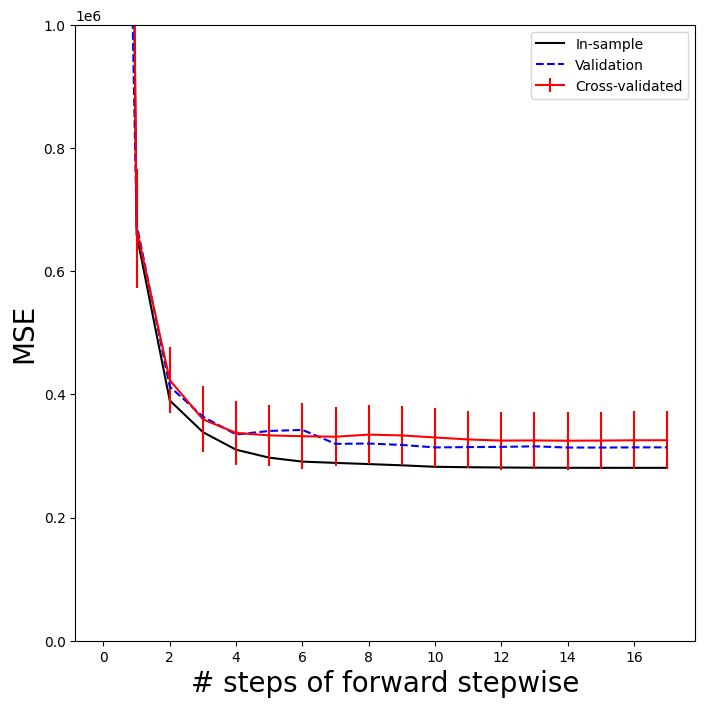

In [527]:
ax.plot(np.arange(n_steps), 
        validation_mse,
        'b--', # color blue, broken line
        label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
# ax.set_ylim([50000,250000])

ax.set_ylim([0,1000000]) # 还以为出错了，原来是y轴的范围没弄对
ax.legend()
mse_fig


(c) Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.

In [528]:
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
# Xs.dropna()
# print(Xs.isnull().any())

lambdas = 10**np.linspace(8, -2, 100) / Y.std()
# soln_array = skl.ElasticNet.path(Xs,
#                                  Y,
#                                  l1_ratio=0.,
#                                  alphas=lambdas)[1]
# soln_array.shape


In [529]:
print(Xs.isnull().any())

intercept       True
Apps           False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
Private_Yes    False
dtype: bool


> print(Xs.isnull().any())可以看变量是否为NAN

> 因此这里需要将截距去掉！

In [530]:
D = design.fit_transform(College)
D = D.drop('intercept', axis=1)
X = np.asarray(D)


In [531]:
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape


(17, 100)

In [532]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path


,Apps,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
negative log(lambda),,,,,,,,,,,,,,,,,
-10.617027,0.056604,0.054695,0.011545,0.014847,0.052450,0.026474,-0.001545,0.005454,0.006811,0.012058,0.021343,0.020253,0.010573,-0.009599,0.007482,0.004039,-0.028513
-10.384442,0.071425,0.069016,0.014568,0.018734,0.066183,0.033405,-0.001949,0.006882,0.008594,0.015215,0.026931,0.025555,0.013341,-0.012112,0.009441,0.005096,-0.035978
-10.151858,0.090125,0.087085,0.018382,0.023639,0.083511,0.042151,-0.002460,0.008683,0.010844,0.019198,0.033982,0.032246,0.016834,-0.015283,0.011913,0.006431,-0.045397
-9.919274,0.113721,0.109885,0.023194,0.029827,0.105374,0.053186,-0.003103,0.010957,0.013683,0.024224,0.042878,0.040687,0.021241,-0.019285,0.015031,0.008114,-0.057282
-9.686689,0.143493,0.138652,0.029265,0.037634,0.132960,0.067109,-0.003916,0.013825,0.017264,0.030565,0.054102,0.051338,0.026802,-0.024333,0.018966,0.010239,-0.072277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.478487,1624.889411,1078.449353,-487.472074,182.949189,-90.442621,-51.244786,244.855599,-13.100142,2.607348,-30.805869,76.368632,9.421028,-18.456679,-68.466859,-154.050049,-21.123829,73.669455
11.711071,1624.898961,1078.482204,-487.482387,182.957339,-90.483141,-51.243548,244.856461,-13.101434,2.607406,-30.805179,76.369468,9.420743,-18.457012,-68.466729,-154.051237,-21.126025,73.670029
11.943655,1624.906528,1078.508242,-487.490561,182.963798,-90.515256,-51.242567,244.857143,-13.102457,2.607452,-30.804631,76.370130,9.420518,-18.457276,-68.466627,-154.052178,-21.127765,73.670483


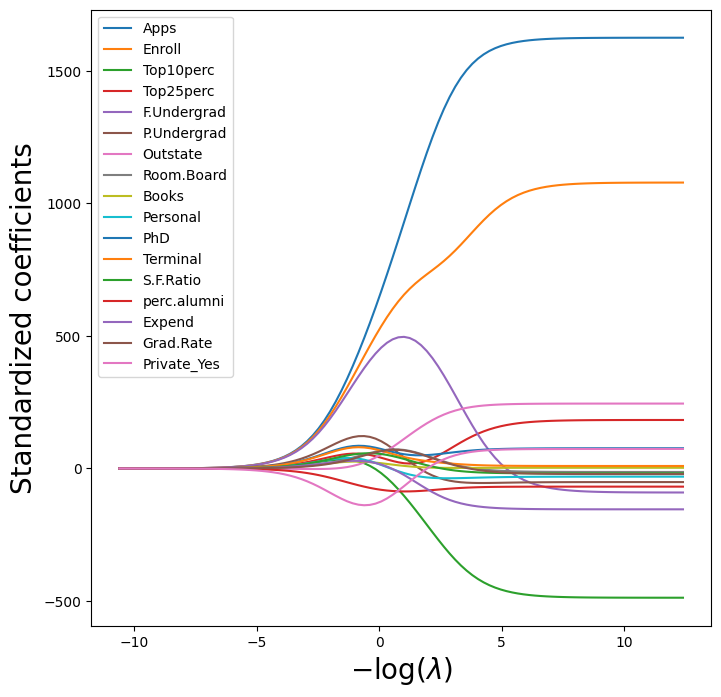

In [533]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');


In [534]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat


(4.693774313662965,
 Apps           293.238864
 Enroll         268.537208
 Top10perc       33.645349
 Top25perc       51.741681
 F.Undergrad    249.269826
 P.Undergrad    103.813561
 Outstate         2.284874
 Room.Board      30.418805
 Books           23.888826
 Personal        38.768447
 PhD             76.335584
 Terminal        71.954024
 S.F.Ratio       44.732085
 perc.alumni    -45.999208
 Expend          26.501330
 Grad.Rate       26.192076
 Private_Yes   -113.909547
 Name: -1.5462370165249801, dtype: float64)

In [535]:
np.linalg.norm(beta_hat)


517.022716106308

In [536]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)


(0.04480435027025947, 1741.4350488758225)

In [537]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.04480435027025947, l1_ratio=0))])

In [538]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


array([255853.93177601])

In [539]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


array([5681489.96514501])

In [540]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=4.082405527821335e-06, l1_ratio=0))])

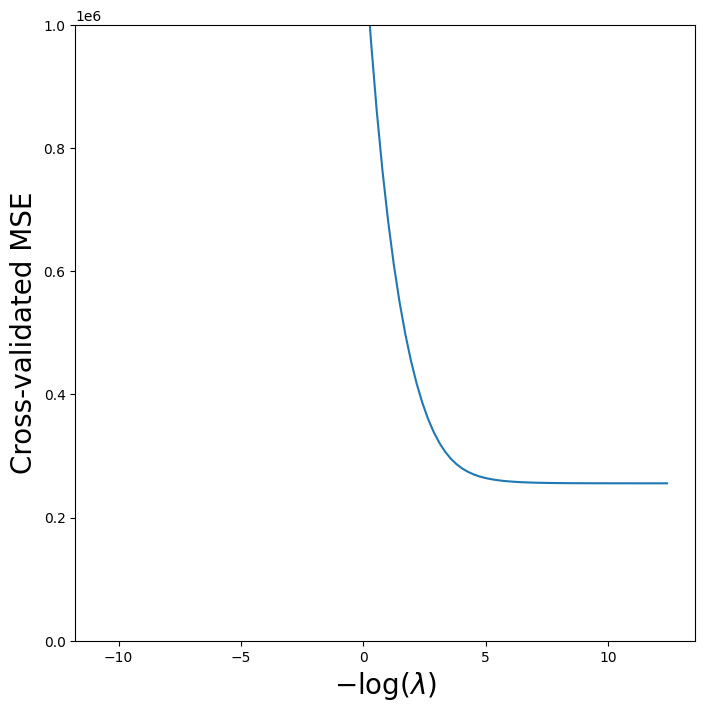

In [541]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
# ax.set_ylim([50000,250000])

ax.set_ylim([0,1000000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [542]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([4.08240553e+04, 3.23523656e+04, 2.56386965e+04, 2.03182285e+04,
       1.61018486e+04, 1.27604397e+04, 1.01124302e+04, 8.01392800e+03,
       6.35090089e+03, 5.03298034e+03, 3.98855085e+03, 3.16085834e+03,
       2.50492618e+03, 1.98511116e+03, 1.57316664e+03, 1.24670766e+03,
       9.87994501e+02, 7.82968745e+02,...
       3.38928479e-04, 2.68595023e-04, 2.12856963e-04, 1.68685503e-04,
       1.33680376e-04, 1.05939412e-04, 8.39551722e-05, 6.65330382e-05,
       5.27262949e-05, 4.17846870e-05, 3.31136499e-05, 2.62420012e-05,
       2.07963372e-05, 1.64807416e-05, 1.30607058e-05, 1.03503860e-05,
       8.20250392e-06, 6.50034408e-06, 5.15141151e-06, 4.08240553e-06]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

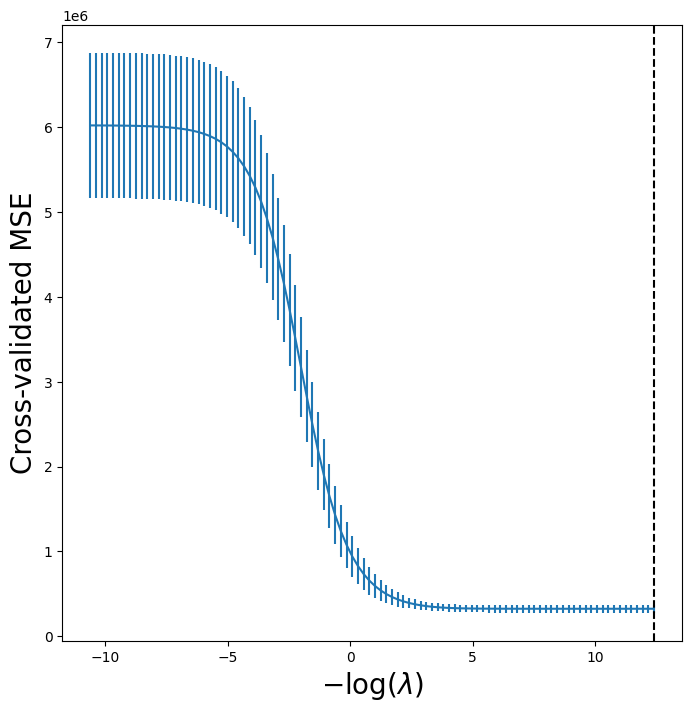

In [543]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [544]:
np.min(tuned_ridge.mse_path_.mean(1))


325450.93498416396

In [545]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)]);


In [546]:
results = skm.cross_validate(pipeCV, 
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')
-results['test_score']


array([158684.28673755])

(d) Fit a lasso model on the training set, with λ chosen by crossvalidation.
Report the test error obtained, along with the number
of non-zero coefficient estimates.

In [547]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_


4.330422608568199

In [548]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))


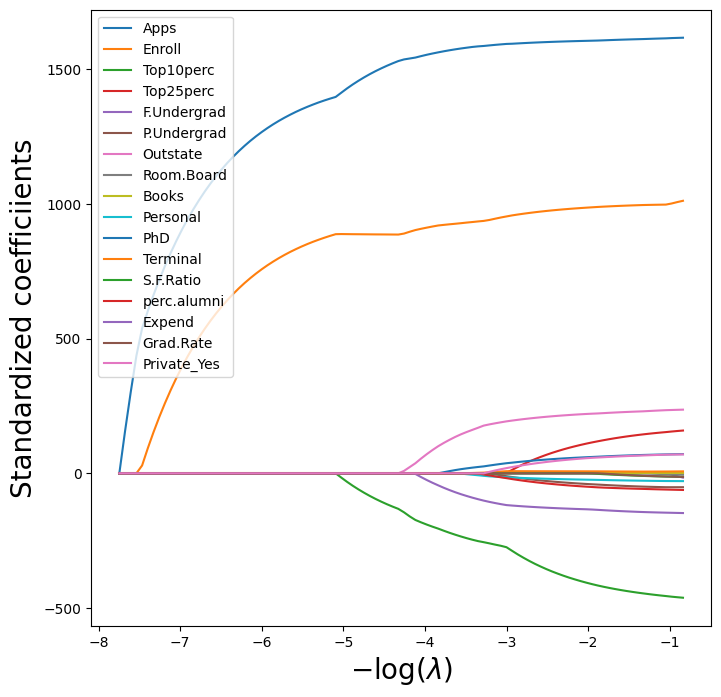

In [549]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);


In [550]:
np.min(tuned_lasso.mse_path_.mean(1))

323785.2153208757

323…… < 325…… (岭回归和套索)

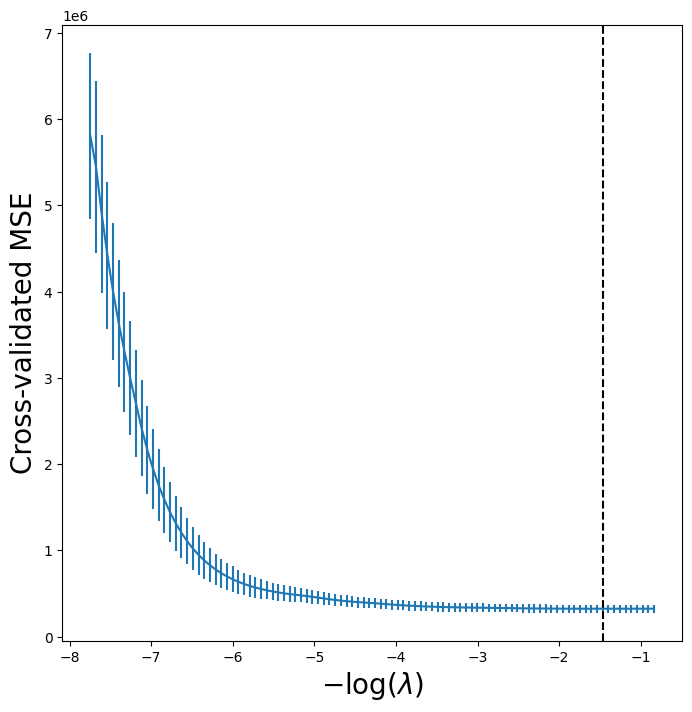

In [551]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [552]:

tuned_lasso.coef_

array([1610.38894779,  993.93684388, -439.43016292,  139.20508928,
         -0.        ,  -47.79507923,  228.42303365,   -0.        ,
          0.        ,  -26.83079747,   66.76738018,    6.64535821,
         -8.11607158,  -56.66119709, -142.12362532,   -7.08586703,
         64.71739313])

(e) Fit a PCR model on the training set, with M chosen by crossvalidation.
Report the test error obtained, along with the value
of M selected by cross-validation.

In [553]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([0.22488965, 0.29876681])

In [554]:
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([ 122.0952994 , 1011.93539453])

In [555]:
param_grid = {'pca__n_components': range(1, 17)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 17)},
             scoring='neg_mean_squared_error')

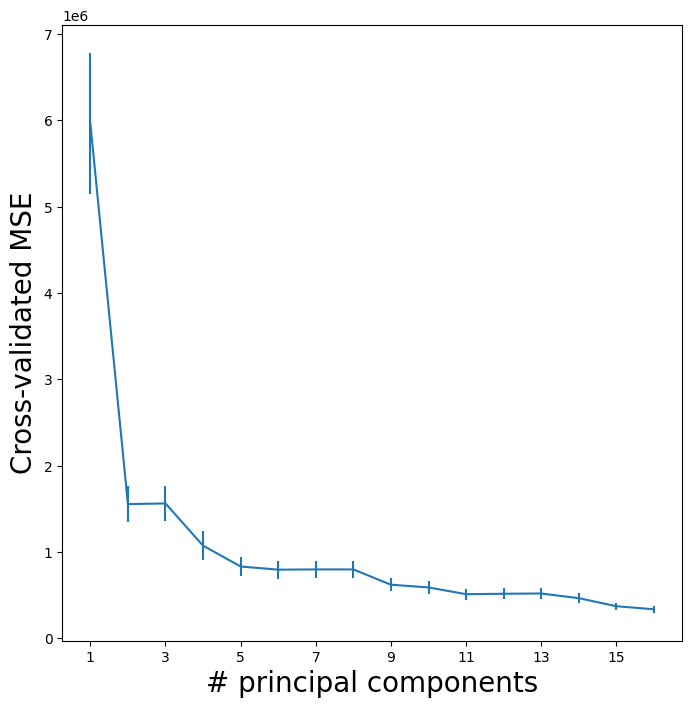

In [556]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
# ax.set_ylim([50000,250000]);


In [557]:
# grid.named_steps['linreg'].coef_

> 这里想看最低点的变量系数是多少

In [568]:
pca = PCA(n_components=5)
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([ 122.09525769, 1011.9354594 ,  -37.33339063,  630.27273425,
        650.04706642])

In [573]:
pca = PCA(n_components=9)
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([ 122.09525737, 1011.93545982,  -37.33611246,  630.27251449,
        650.04615193,   79.49115243,  -41.57695617, -136.12987342,
       -533.83258127])

> 这里想到看最低点系数的方法是重新拟合一个新的pca

In [570]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
                             Xn,
                             Y,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()


6016550.750106171

In [571]:
-cv_null['test_score']

array([3435217.72783271, 8059167.73629255, 6003904.05619109,
       4379043.73234346, 8205420.49787105])

In [572]:
pipe.named_steps['pca'].explained_variance_ratio_


array([0.31862586, 0.25333236, 0.06994848, 0.05571303, 0.05442291,
       0.04987255, 0.03625511, 0.03446438, 0.03016785])

(f) Fit a PLS model on the training set, with M chosen by crossvalidation.
Report the test error obtained, along with the value
of M selected by cross-validation.

In [574]:
pls = PLSRegression(n_components=2, 
                    scale=True)
pls.fit(X, Y)


PLSRegression()

In [575]:
param_grid = {'n_components':range(1, 20)}
grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

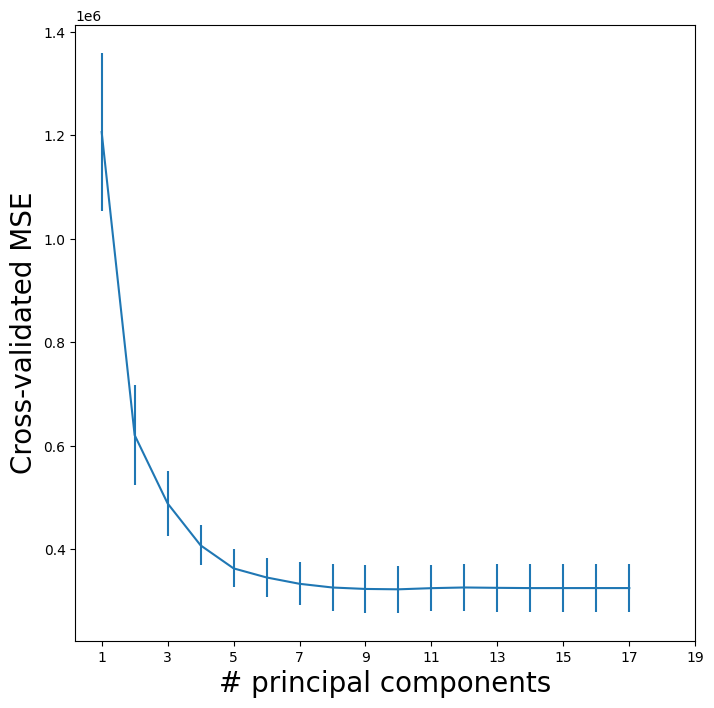

In [577]:
pls_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
# ax.set_ylim([50000,250000]);


(g) Comment on the results obtained. How accurately can we predict
the number of college applications received? Is there much
difference among the test errors resulting from these five approaches?